# Ursprung der Daten
Titanic Datensatz von [kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data) heruntergeladen am 21.11.2025 um 19:22 Uhr.

# Imports

In [32]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Daten laden und erste Eindrücke sammeln

In [33]:
df = pd.read_csv("./data/Titanic-Dataset.csv")

## Head

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Info

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Describe

In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Unique Values

In [37]:
df.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

## Erkenntnisse aus den ersten Eindrücken
- bei Cabin fehlen zu viele Daten. 
- bei Ticket, PassengerId und Name gibt es zu viele unterschiedliche Daten
- bei Age gibt es 177 Null-Werte
- Sex und Embarked müss encoded werden


# Datenbereinigung

## Cabin, Ticket, PassengerId und Name entfernen

In [38]:
df.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)

## Null-Werte bei Age mit dem Durchschnitt auffüllen

### Verteilung des Alters

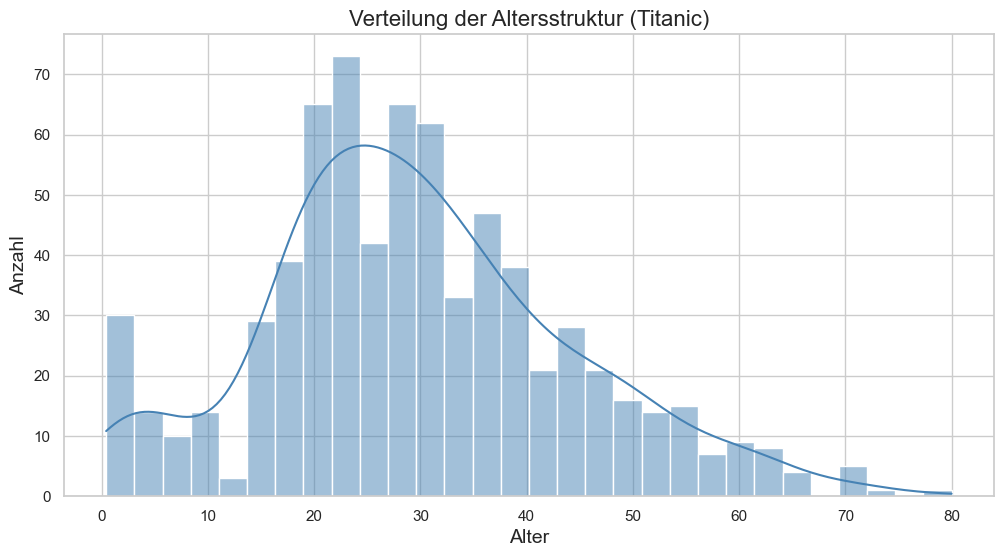

Durchschnittsalter 29.69911764705882
Median-Alter 28.0


In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(df["Age"], bins=30, kde=True, color="steelblue")

plt.title("Verteilung der Altersstruktur (Titanic)", fontsize=16)
plt.xlabel("Alter", fontsize=14)
plt.ylabel("Anzahl", fontsize=14)

plt.show()
print(f"Durchschnittsalter {df['Age'].mean()}")
print(f"Median-Alter {df['Age'].median()}")


Durchschnittsalter und Median sind ähnlich hoch, der Median wird nun aber bevorzugt verwendet, da dieser die Ausreißer kompensieren soll.

In [40]:
df['Age'] = df['Age'].fillna(df['Age'].median())

## Encoding vom Sex

In [41]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

## Auffüllen und Encoding von Embarked (Abfahrtsort)

### Null-Werte werden mit den am häufigsten vorkommendem Wert aufgefüllt

In [42]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### One-Hot-Encoding
Aus der Spalte 'Embarked' werden die binären Spalten 'Embarked_S' und 'Embarked_Q'. Der Abfahrtsort C wird abgeleitet und trifft dann zu, wenn 'Embarked_S' und 'Embarked_Q' beide 0 sind.

In [43]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Daten nach der Bereinigung 
## Head

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Info

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


# Train-Test-Split

In [ ]:
X = df.drop(columns=["Survived"])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Modell-Auswahl und Training
Bei dem Datensatz soll eine Klassifikation vorgenommen werden, daher eignet sich beispielsweise Logistische Regression

In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Metriken

In [48]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

## Confusion Matrix

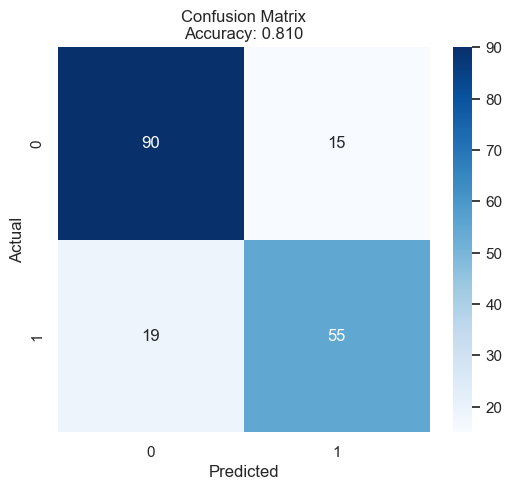

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {acc:.3f}')
plt.savefig('./data/confusion_matrix.png', bbox_inches='tight')
plt.show()

# ROC

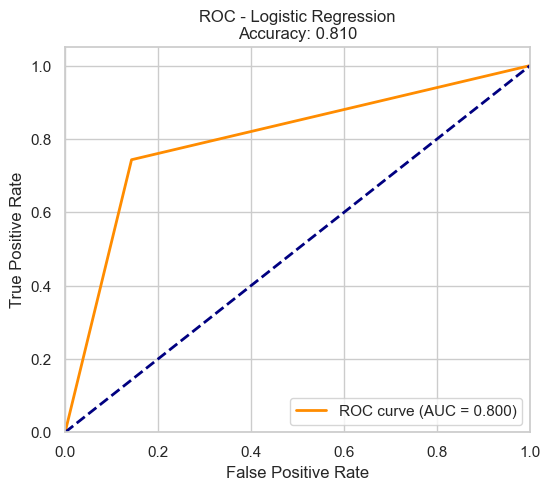

In [50]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC - Logistic Regression\nAccuracy: {acc:.3f}')
plt.legend(loc="lower right")
plt.savefig('./data/roc_curve.png', bbox_inches='tight')
plt.show()

## Korrelationen

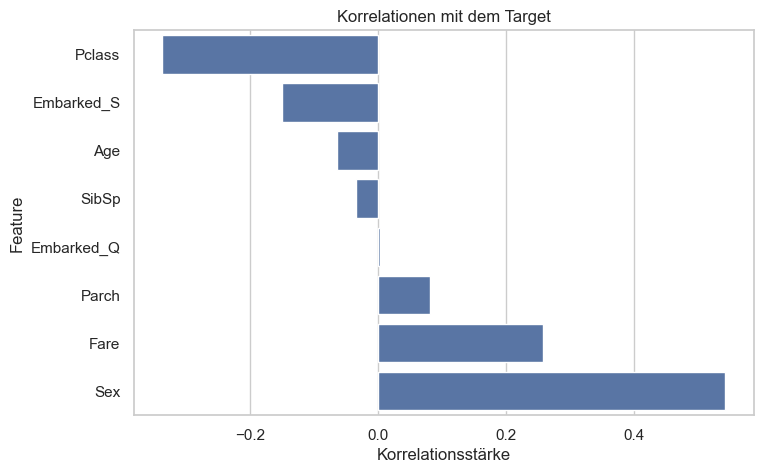

In [51]:
corr = df.corr()["Survived"].drop("Survived").sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=corr.values, y=corr.index)
plt.title("Korrelationen mit dem Target")
plt.xlabel("Korrelationsstärke")
plt.ylabel("Feature")
plt.savefig('./data/correlations.png', bbox_inches='tight')
plt.show()

# Modell speichern

In [52]:
joblib.dump(model, "./data/model.pkl")
joblib.dump(X.columns, "./data/feature_names.pkl")

['./data/feature_names.pkl']